In [1]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy

In [2]:
# dataset IV
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:, 1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

In [3]:
loss_hist_batch = []

lam = 0.01
w = 10.0
iteration = 300
alpha = 0.1
lip = 0.25*max(x_d4[:,0]**2)

def loss_func(w,X,y,lam):
    n = len(y)
    return 1/n * np.sum(np.log(1+np.exp(-y*(w*X[:,0]-X[:,1])))) + lam * w**2

def direction(w,X,y,lam):
    n = len(y)
    return 1/n * np.sum(1*y*X[:,0]*(1 - (1/(1 + np.exp(-y*(w*X[:,0]-X[:,1])))))) + 2*lam*w

for t in range(1,iteration+1):
    direct = direction(w,x_d4,y_d4,lam)
    loss = loss_func(w,x_d4,y_d4,lam)
    loss_hist_batch.append(loss)
    w -= (alpha/np.sqrt(t)/lip) * direct


In [4]:
loss_hist_newton = []

lam = 0.01
w = 10.0
iteration = 300
alpha = 0.1

def grad(w,X,y,lam):
    n = len(y)
    hess = (1/(1 + np.exp(-y*(w*X[:,0]-X[:,1])))) * (1 - (1/(1 + np.exp(-y*(w*X[:,0]-X[:,1]))))) 
    return 1/n * np.sum(hess * X[:,0]**2) + 2*lam

for t in range(1,iteration+1):
    direct = direction(w,x_d4,y_d4,lam)
    hess = grad(w,x_d4,y_d4,lam)
    loss = loss_func(w,x_d4,y_d4,lam)
    loss_hist_newton.append(loss)
    w -= (alpha/np.sqrt(t+10)) * (direct/hess)

min_loss = min(min(loss_hist_batch,loss_hist_newton))

Text(0, 0.5, 'loss')

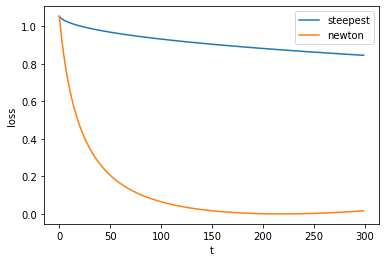

In [5]:
# plot the result
plt.plot((np.abs(loss_hist_batch - min_loss)),label='steepest')
plt.plot((np.abs(loss_hist_newton - min_loss)),label='newton')
plt.legend()
plt.xlabel('t')
plt.ylabel('loss')

In [6]:
#dataset V
n = 200
x_d5 = 3*(np.random.rand(n,4)-0.5)
W = np.array([[2,-1,0.5],
             [-3,2,1],
             [1,2,3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2],np.ones((n,1))]),W.T) + 0.5*np.random.randn(n,3),axis=1)

In [7]:
def OHV(Y,class_n):
    y = np.zeros((200,3))
    for i in range(len(Y)):
        yi = np.zeros(class_n)
        yi[Y[i]] = 1
        y[i] = yi
    
    return y

In [8]:
# 多クラスロジスティック回帰
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# 判別結果
def f(x0, x1):
    return np.argmax(np.dot(w.T, np.array([x0, x1, 1.0])))

# 交差エントロピー誤差
def Ew(y, T):
    ew = 0
    for n in range(N):
        for k in range(K):
            ew -= T[n, k] * np.log(y[n, k])
    return ew

# ソフトマックス関数
def softmax(a, k):
    return np.exp(a[k])/np.sum(np.exp(a))

# 重み付け行列Rを計算
def R_(y, i, j):
    I = np.eye(N)
    R_ij = np.empty(N)
    for k in range(N):
        R_ij[k] = y[k, i] * (I[i, j] - y[k, j])
    return np.diag(R_ij)

# ヘッセ行列を計算
def H_(y):
    H = np.empty([M * K, M * K])
    for i in range(K):
        for j in range(K):
            # 重み付け行列R
            R = R_(y, i, j)
            H[M * j:M * j + M, M * i:M * i + M] = np.dot(np.dot(X.T, R), X)
    return H

Multi_loss_hist_batch = []

N = y_d5.shape[0] #
M = x_d5.shape[1] # x次元
K = 3 # class

X = x_d5

T = OHV(y_d5,K)
# パラメータw初期化
w = np.zeros([M, K])

# ベクトルy
y = np.zeros([N, K])
a = np.dot(X, w)
for i in range(N):
    y[i, :] = np.array([softmax(a[i, :], k) for k in range(K)])

# 勾配ベクトルを計算
dw = np.zeros([M*K])
for k in range(K):
    dw[k * M:k * M + M] = np.dot(X.T, y[:, k] - T[:, k])

# 最急降下法
w = w.T.flatten()
for it in range(100):
# 交差エントロピー誤差
    Multi_loss_hist_batch.append(Ew(y,T))
    w -= 0.1*dw
    a = np.dot(X, w.reshape([K, M]).T)
    for i in range(N):
        y[i, :] = np.array([softmax(a[i, :], k) for k in range(K)])
    for k in range(K):
        dw[k * M:k * M + M] = np.dot(X.T, y[:, k] - T[:, k])
w = w.reshape([M, K]).T


In [9]:
Multi_loss_hist_newton = []
X = x_d5
T = OHV(y_d5,K)

# パラメータw初期化
w = np.zeros([M, K])

# ベクトルy
y = np.zeros([N, K])
a = np.dot(X, w)
for i in range(N):
    y[i, :] = np.array([softmax(a[i, :], k) for k in range(K)])

# 勾配ベクトルを計算
dw = np.zeros([M*K])
for k in range(K):
    dw[k * M:k * M + M] = np.dot(X.T, y[:, k] - T[:, k])
# ヘッセ行列
H = H_(y)

# ニュートン法
w = w.T.flatten()
for ite in range(100):
    #print(Ew(y, T))
    Multi_loss_hist_newton.append(Ew(y,T))
    # w -= np.dot(np.linalg.inv(H), dw)
    w -= np.dot(np.linalg.pinv(H), dw)
    # yを再計算
    a = np.dot(X, w.reshape([K, M]).T)
    for i in range(N):
        y[i, :] = np.array([softmax(a[i, :], k) for k in range(K)])
    # 勾配を再計算
    for k in range(K):
        dw[k * M:k * M + M] = np.dot(X.T, y[:, k] - T[:, k])
    # ヘッセ行列を再計算
    H = H_(y)
    
w = w.reshape([M, K]).T

Text(0, 0.5, 'cross entropy loss')

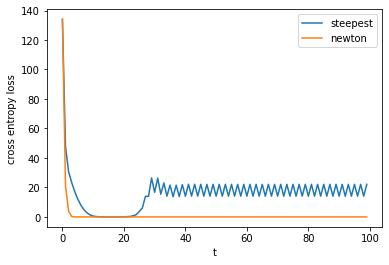

In [10]:
Multi_min_loss = min(min(Multi_loss_hist_batch,Multi_loss_hist_newton))
plt.plot((np.abs(Multi_loss_hist_batch - Multi_min_loss)),label='steepest')
plt.plot((np.abs(Multi_loss_hist_newton - Multi_min_loss)),label='newton')
plt.legend()
plt.xlabel('t')
plt.ylabel('cross entropy loss')

In [11]:
print(Multi_min_loss)

85.64305857991212
